In [1]:
from graph_functions import * 
from sample_aggregate import partition, hist_plot
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

### Generate Graph

In [2]:
%%time
g = generatePlantedPartition(2, 5000, 0.02, 0.005)

CPU times: user 5.15 s, sys: 456 ms, total: 5.6 s
Wall time: 6.05 s


### Testing Conductance Calculation

#### Edge Conductance

In [3]:
%%time
A = np.array(nx.to_numpy_matrix(g))

CPU times: user 2.68 s, sys: 2.16 s, total: 4.85 s
Wall time: 5.83 s


In [4]:
%%time
C_edge = cluster(A)

CPU times: user 1min 1s, sys: 8.14 s, total: 1min 10s
Wall time: 40.7 s


In [5]:
%%time
cond_edge = conductance(C_edge, A)

CPU times: user 1.68 s, sys: 1.59 s, total: 3.27 s
Wall time: 4.28 s


In [6]:
print cond_edge

0.25147012812


### Triangle Conductance

In [7]:
%%time
M = reweightEdgesByTri(g)

CPU times: user 5.43 s, sys: 687 ms, total: 6.12 s
Wall time: 8.23 s


In [8]:
%%time
C_tri = cluster(M)

CPU times: user 59.2 s, sys: 10.3 s, total: 1min 9s
Wall time: 39 s


In [9]:
%%time
cond_tri = conductance(C_tri, M)

CPU times: user 1.25 s, sys: 869 ms, total: 2.12 s
Wall time: 2.18 s


In [10]:
print cond_tri

0.119115576287


### Sample and Aggregate Stability

In [ ]:
g = generatePlantedPartition(2, 5000, 0.05, 0.01)

In [11]:
%%time
samples = partition(g)
sample_edge_conds = [approxEdgeConductance(sg) for sg in samples]

Using 9 samples.
CPU times: user 4.14 s, sys: 796 ms, total: 4.93 s
Wall time: 4.7 s


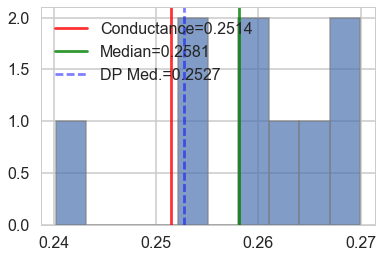

In [12]:
hist_plot(sample_edge_conds, cond_edge)

In [13]:
%%time
samples = partition(g)
sample_tri_conds = [approxTriConductance(sg) for sg in samples]

Using 9 samples.


/Users/alexandergoldberg/.virtualenvs/cs227/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 7.32 s, sys: 373 ms, total: 7.69 s
Wall time: 7.5 s


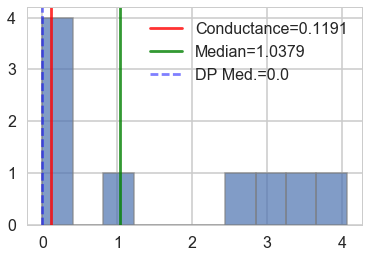

In [14]:
hist_plot(sample_tri_conds, cond_tri)

### Testing all Methods on Planted Partition Model ##

In [2]:
from run import test_all_pp, test_all
from graph_functions import *

#### N = 5000, P_in = 0.05, P_out= 0.01 ####

In [3]:
%%time
# generate planted partition graph
g = generatePlantedPartition(2, 5000, 0.05, 0.01)

CPU times: user 12.2 s, sys: 1.31 s, total: 13.5 s
Wall time: 15.2 s


In [4]:
print "n=" + str(g.number_of_nodes())
print "m=" + str(g.number_of_edges())
print "Density=" + str(2.0*g.number_of_edges()/(g.number_of_nodes()*(g.number_of_nodes() - 1)))

n=10000
m=1500295
Density=0.0300089008901


In [5]:
%%time
results1 = test_all(g, eps=0.1, iters=50)

func:'approxEdgeConductance' took: 62.0860 sec
func:'approxTriConductance' took: 134.5231 sec

*********ITER 0************
func:'sample_agg' took: 7.4477 sec

func:'sample_agg' took: 7.1049 sec

*********ITER 1************
func:'sample_agg' took: 6.6411 sec

func:'sample_agg' took: 9.3125 sec

*********ITER 2************
func:'sample_agg' took: 6.5914 sec

func:'sample_agg' took: 9.2212 sec

*********ITER 3************
func:'sample_agg' took: 6.6125 sec

func:'sample_agg' took: 8.1911 sec

*********ITER 4************
func:'sample_agg' took: 6.7055 sec



/Users/alexandergoldberg/.virtualenvs/cs227/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


func:'sample_agg' took: 7.4129 sec

*********ITER 5************
func:'sample_agg' took: 5.7648 sec

func:'sample_agg' took: 7.2433 sec

*********ITER 6************
func:'sample_agg' took: 7.5665 sec

func:'sample_agg' took: 9.5364 sec

*********ITER 7************
func:'sample_agg' took: 7.4922 sec

func:'sample_agg' took: 7.3150 sec

*********ITER 8************
func:'sample_agg' took: 6.7272 sec

func:'sample_agg' took: 7.6748 sec

*********ITER 9************
func:'sample_agg' took: 6.6310 sec

func:'sample_agg' took: 7.4820 sec

*********ITER 10************
func:'sample_agg' took: 6.9815 sec

func:'sample_agg' took: 7.0557 sec

*********ITER 11************
func:'sample_agg' took: 6.8158 sec

func:'sample_agg' took: 8.1788 sec

*********ITER 12************
func:'sample_agg' took: 6.9561 sec

func:'sample_agg' took: 7.9844 sec

*********ITER 13************
func:'sample_agg' took: 6.6440 sec

func:'sample_agg' took: 7.5906 sec

*********ITER 14************
func:'sample_agg' took: 6.9071 

In [6]:
%%time
results2 = test_all(g, eps=0.5, iters=50)

func:'approxEdgeConductance' took: 74.7892 sec
func:'approxTriConductance' took: 117.3289 sec

*********ITER 0************
func:'sample_agg' took: 8.5011 sec

func:'sample_agg' took: 8.2609 sec

*********ITER 1************
func:'sample_agg' took: 7.2409 sec

func:'sample_agg' took: 7.9086 sec

*********ITER 2************
func:'sample_agg' took: 9.4440 sec

func:'sample_agg' took: 6.5054 sec

*********ITER 3************
func:'sample_agg' took: 5.7425 sec

func:'sample_agg' took: 8.6587 sec

*********ITER 4************
func:'sample_agg' took: 6.7642 sec

func:'sample_agg' took: 6.4461 sec

*********ITER 5************
func:'sample_agg' took: 9.1369 sec

func:'sample_agg' took: 9.3509 sec

*********ITER 6************
func:'sample_agg' took: 7.5550 sec

func:'sample_agg' took: 9.2439 sec

*********ITER 7************
func:'sample_agg' took: 26.9217 sec

func:'sample_agg' took: 10.0994 sec

*********ITER 8************
func:'sample_agg' took: 9.0259 sec

func:'sample_agg' took: 7.0862 sec

***

In [7]:
%%time
results4 = test_all(g, eps=3.0, iters=50)

func:'approxEdgeConductance' took: 84.1019 sec
func:'approxTriConductance' took: 112.6581 sec

*********ITER 0************
func:'sample_agg' took: 8.8305 sec

func:'sample_agg' took: 9.1447 sec

*********ITER 1************
func:'sample_agg' took: 9.7546 sec

func:'sample_agg' took: 7.8102 sec

*********ITER 2************
func:'sample_agg' took: 6.1356 sec

func:'sample_agg' took: 9.4143 sec

*********ITER 3************
func:'sample_agg' took: 13.0906 sec

func:'sample_agg' took: 6.7639 sec

*********ITER 4************
func:'sample_agg' took: 6.4242 sec

func:'sample_agg' took: 7.3593 sec

*********ITER 5************
func:'sample_agg' took: 6.4017 sec

func:'sample_agg' took: 7.6693 sec

*********ITER 6************
func:'sample_agg' took: 7.0142 sec

func:'sample_agg' took: 11.5513 sec

*********ITER 7************
func:'sample_agg' took: 7.6746 sec

func:'sample_agg' took: 7.0784 sec

*********ITER 8************
func:'sample_agg' took: 13.5501 sec

func:'sample_agg' took: 8.7870 sec

**

In [33]:
# eps = 0.5
def print_res(results, eps):
    edgeVals=[results[i]['edgeCond_samp'] for i in range(50)]
    print "Edge Cond (eps=%s) --> Mean: %f, Range: (%f, %f)" % (str(eps)[:3], np.mean(edgeVals), min(edgeVals), max(edgeVals))
    triVals=[results[i]['triCond_samp'] for i in range(50)]
    print "Tri Cond (eps=%s) --> Mean: %f, Range: (%f, %f)" % (str(eps)[:3], np.mean(triVals), min(triVals), max(triVals))

print "Actual Edge: %f, Actual Tri: %f" % (results1['edgeCond'], results1['triCond'])
print_res(results1, 0.1)
print_res(results2, 0.5)
print_res(results4, 3.0)

Actual Edge: 0.200298, Actual Tri: 0.077164
Edge Cond (eps=0.1) --> Mean: 0.210125, Range: (0.196936, 0.244861)
Tri Cond (eps=0.1) --> Mean: 0.082431, Range: (0.072035, 0.099231)
Edge Cond (eps=0.5) --> Mean: 0.208108, Range: (0.195205, 0.224579)
Tri Cond (eps=0.5) --> Mean: 0.080704, Range: (0.073773, 0.088311)
Edge Cond (eps=3.0) --> Mean: 0.206183, Range: (0.198639, 0.213819)
Tri Cond (eps=3.0) --> Mean: 0.081335, Range: (0.076679, 0.087438)


#### N = 5000, P_in = 0.01, P_out= 0.002 ####

In [36]:
%%time
# generate planted partition graph
g2 = generatePlantedPartition(2, 5000, 0.01, 0.002)

CPU times: user 2.38 s, sys: 137 ms, total: 2.52 s
Wall time: 2.54 s


In [42]:
%%time
results21 = test_all(g2, eps=0.1, iters=20, k_sample=int(np.log(10000)**(1.5)))

func:'approxEdgeConductance' took: 37.8480 sec
func:'approxTriConductance' took: 42.3705 sec

*********ITER 0************
func:'sample_agg' took: 8.6423 sec

func:'sample_agg' took: 4.9782 sec

*********ITER 1************
func:'sample_agg' took: 6.7085 sec

func:'sample_agg' took: 5.5528 sec

*********ITER 2************
func:'sample_agg' took: 6.5856 sec

func:'sample_agg' took: 5.2357 sec

*********ITER 3************
func:'sample_agg' took: 7.2120 sec

func:'sample_agg' took: 4.4510 sec

*********ITER 4************
func:'sample_agg' took: 6.5380 sec

func:'sample_agg' took: 5.3311 sec

*********ITER 5************
func:'sample_agg' took: 6.4360 sec

func:'sample_agg' took: 5.2309 sec

*********ITER 6************
func:'sample_agg' took: 6.5570 sec

func:'sample_agg' took: 4.9650 sec

*********ITER 7************
func:'sample_agg' took: 7.1150 sec

func:'sample_agg' took: 4.8762 sec

*********ITER 8************
func:'sample_agg' took: 7.5573 sec

func:'sample_agg' took: 5.6247 sec

******

In [43]:
print "Actual Edge: %f, Actual Tri: %f" % (results21['edgeCond'], results21['triCond'])
print_res(results21, 0.1)

Actual Edge: 0.498675, Actual Tri: 0.395293
Edge Cond (eps=0.1) --> Mean: 0.685659, Range: (0.396681, 2.575000)
Tri Cond (eps=0.1) --> Mean: 0.149871, Range: (0.000000, 0.600000)


In [ ]:
%%time
results22 = test_all(g2, eps=0.5, iters=50)

In [ ]:
%%time
results23 = test_all(g2, eps=3.0, iters=50)

### Testing on Real Graph ##